## **Ejercicio 1: Principios de probabilidad**

$p(A|B) = \frac{p(B|A)p(A)}{P(B)}$

Este ejercicio consiste en mostrar todas las posibles probabilidades marginales y conjuntas dado que se conocen la lista de eventos y los priors.

In [12]:
import numpy as np

def mybayes(list_event, priors):
    """
    Función para calcular las probabilidades posteriores utilizando el Teorema de Bayes.

    Parámetros:
    -----------
    list_event : list of lists
        Lista de listas donde cada sublista representa un conjunto de eventos (por ejemplo, tipos de frutas) en una caja o grupo.
        
    priors : list of floats
        Lista que contiene las probabilidades a priori de que un evento provenga de una caja específica. Cada elemento 
        en `priors` corresponde a la probabilidad a priori de la caja en la misma posición en `list_event`.

    Retorna:
    --------
    No retorna ningún valor, pero imprime las probabilidades marginales de cada fruta y las probabilidades posteriores 
    de que una caja específica contenga una fruta determinada.
    """
    
    # Número de cajas
    nB = len(list_event)
    
    # Inicializa un arreglo para almacenar el número de eventos en cada caja
    even_ = np.zeros(nB)
    
    # Identificar todas las frutas distintas presentes en las cajas
    frutas = set()
    for sublista in list_event:
        frutas.update(sublista)
    frutas = list(frutas)
    
    # Calcular las probabilidades marginales de cada fruta
    marginales = np.zeros(len(frutas))
    for i, fruta in enumerate(frutas):
        # Probabilidad marginal de la fruta i-esima
        marginales[i] = sum([priors[b] * list_event[b].count(fruta) / len(list_event[b]) for b in range(nB)])
        print(f'P(F={fruta}) = {marginales[i]:.4f}')
    
    # Calcular las probabilidades condicionales y posteriores
    for b in range(nB):
        # Total de frutas en la caja b
        num_total = len(list_event[b])
        
        for fruta in np.unique(list_event[b]):
            # Índice de la fruta en la lista de frutas
            index_fruta = frutas.index(fruta)
            # Número de veces que la fruta aparece en la caja b
            num_veces_f = list_event[b].count(fruta)  
                
            # Probabilidad de observar la fruta dada la caja (verosimilitud)
            verosim = num_veces_f / num_total 
            # Probabilidad posterior utilizando la fórmula de Bayes
            posterior = (verosim * priors[b]) / marginales[index_fruta]
            print(f'P(B = {chr(65+b)} | F={fruta}) = {posterior:.4f}')


In [13]:
list_event = [[1,1,0,0,0,0,0,0], [1,1,1,0,2,2], [2,1,0]]
priors = np.array([0.3, 0.6, 0.1])

#La función primero identificará todos los eventos únicos en las cajas: 0, 1, y 2.

mybayes(list_event, priors)

P(F=0) = 0.3583
P(F=1) = 0.4083
P(F=2) = 0.2333
P(B = A | F=0) = 0.6279
P(B = A | F=1) = 0.1837
P(B = B | F=0) = 0.2791
P(B = B | F=1) = 0.7347
P(B = B | F=2) = 0.8571
P(B = C | F=0) = 0.0930
P(B = C | F=1) = 0.0816
P(B = C | F=2) = 0.1429


****

## **Ejercicio 2: Distribuciones Gaussianas**

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de datos sintéticos

# Parámetros para la primera distribución (x1)
m1 = 0.1  # Media de la distribución normal para x1
v1 = 0.8  # Desviación estándar de la distribución normal para x1
n1 = 100  # Número de muestras para x1
x1 = np.random.normal(m1, v1, n1)  # Generación de n1 muestras desde una distribución normal con media m1 y desviación estándar v1

# Parámetros para la segunda distribución (x2)
m2 = 1.5  # Media de la distribución normal para x2
v2 = 0.6  # Desviación estándar de la distribución normal para x2
n2 = 80   # Número de muestras para x2
x2 = np.random.normal(m2, v2, n2)  # Generación de n2 muestras desde una distribución normal con media m2 y desviación estándar v2

# Parámetros para la distribución y1 asociada a x1
m_y1 = 0.5  # Media de la distribución normal para y1
v_y1 = 0.15  # Desviación estándar de la distribución normal para y1
n_y1 = n1  # Número de muestras para y1 (igual a n1)
y1 = np.random.normal(m_y1, v_y1, n_y1)  # Generación de n_y1 muestras desde una distribución normal con media m_y1 y desviación estándar v_y1

# Parámetros para la distribución y2 asociada a x2
m_y2 = 1.5  # Media de la distribución normal para y2
v_y2 = 0.15  # Desviación estándar de la distribución normal para y2
n_y2 = n2  # Número de muestras para y2 (igual a n2)
y2 = np.random.normal(m_y2, v_y2, n_y2)  # Generación de n_y2 muestras desde una distribución normal con media m_y2 y desviación estándar v_y2


In [15]:
### P(Y)

# Identificar los índices en y1 donde los valores son menores que 1
ind_y1 = [i for i, valor in enumerate(y1) if valor < 1]
P_y1 = len(ind_y1)  # Contar cuántos valores en y1 cumplen la condición

# Identificar los índices en y2 donde los valores son mayores o iguales a 1
ind_y2 = [i for i, valor in enumerate(y2) if valor >= 1]
P_y2 = len(ind_y2)  # Contar cuántos valores en y2 cumplen la condición

### P(X)

# Primero combinamos los datos de x1 y x2 en un solo arreglo X
X = np.concatenate((x1, x2))

# Luego, dividimos el rango de X en 9 subintervalos iguales
dist = np.abs(max(X) - min(X)) / 9  # Distancia entre los subintervalos

# Inicializamos un array P_X para almacenar las probabilidades en cada subintervalo
P_X = np.zeros(9)

# Calcular la probabilidad de que un valor de X caiga dentro de cada subintervalo
for i in range(len(P_X)):
    P_X[i] = sum(1 for elemento in X if min(X) + i * dist < elemento < min(X) + (i + 1) * dist) / len(X)

### P(X|Y=1)

# Inicializamos un array P_XY1 para almacenar las probabilidades condicionales P(X | Y=1)
P_XY1 = np.zeros(9)

# Calcular la probabilidad condicional de que un valor de x1 caiga en cada subintervalo, dado que Y=1
for i in range(len(P_XY1)):
    P_XY1[i] = sum(1 for elemento in x1 if min(x1) + i * dist < elemento < min(x1) + (i + 1) * dist) / len(x1)


In [16]:
# Función que devuelve la densidad de probabilidad de la distribución normal (gaussiana)
def dist_normal(mu, varianza, x):
    """
    Calcula la densidad de probabilidad de una distribución normal (gaussiana) para un conjunto de valores `x`.

    Parámetros:
    -----------
    mu : float
        La media de la distribución normal.
        
    varianza : float
        La varianza de la distribución normal.
        
    x : array-like
        Un valor o un array de valores para los cuales se desea calcular la densidad de probabilidad.

    Retorna:
    --------
    array-like
        Un valor o un array de valores que representan la densidad de probabilidad de la distribución normal
        evaluada en cada punto de `x`.

    Ejemplo:
    --------
    >>> mu = 0
    >>> varianza = 1
    >>> x = np.array([-1, 0, 1])
    >>> dist_normal(mu, varianza, x)
    array([0.24197072, 0.39894228, 0.24197072])
    """

    # Cálculo del exponente en la fórmula de la distribución normal
    exponente = -((x - mu) ** 2) / (2 * varianza)
    # Cálculo del coeficiente de la distribución normal
    coeficiente = 1 / np.sqrt(2 * np.pi * varianza)
    # Devuelve la densidad de probabilidad aplicando la fórmula completa
    return coeficiente * np.exp(exponente)


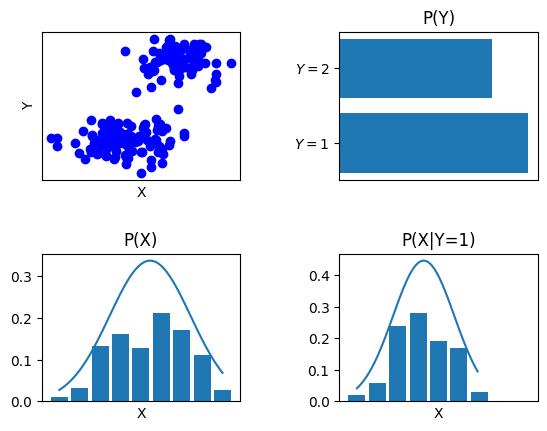

In [17]:
# Crear una figura y un conjunto de ejes dispuestos en una cuadrícula de 2x2
fig, axs = plt.subplots(2, 2)

# Gráfico 1: Scatter plot de x1 y y1, y x2 y y2
axs[0, 0].scatter(x1, y1, c='b')  # Gráfico de dispersión de x1 vs y1 en color azul
axs[0, 0].scatter(x2, y2, c='b')  # Gráfico de dispersión de x2 vs y2 en color azul
axs[0, 0].set_xticks([])           # Eliminar las marcas en el eje x
axs[0, 0].set_xlabel('X')          # Etiqueta del eje x
axs[0, 0].set_yticks([])           # Eliminar las marcas en el eje y
axs[0, 0].set_ylabel('Y')          # Etiqueta del eje y

# Gráfico 2: Barras horizontales de las probabilidades de Y
axs[0, 1].barh(["$Y=1$", "$Y=2$"], [P_y1, P_y2])  # Gráfico de barras horizontales para P(Y)
axs[0, 1].set_title("P(Y)")                        # Título del gráfico
axs[0, 1].set_xticks([])                           # Eliminar las marcas en el eje x

# Gráfico 3: Distribución normal y barras para P(X)
ejeX = np.linspace(min(X), max(X), 100)  # Generar un rango de valores para el eje x
distri = np.linspace(min(X), max(X), len(P_X))  # Generar un rango para las posiciones de las barras
axs[1, 0].plot(ejeX, dist_normal((m1 + m2) / 2, v1 + v2, ejeX))  # Graficar la distribución normal en ejeX
axs[1, 0].bar(distri, P_X, width=0.5)  # Graficar barras para P(X) en distri
axs[1, 0].set_xticks([])               # Eliminar las marcas en el eje x
axs[1, 0].set_xlabel('X')              # Etiqueta del eje x
axs[1, 0].set_title("P(X)")            # Título del gráfico

# Gráfico 4: Distribución normal y barras para P(X|Y=1)
ejeX2 = np.linspace(min(x1), max(x1), 100)  # Generar un rango de valores para el eje x basado en x1
axs[1, 1].plot(ejeX2, dist_normal(m1, v1, ejeX2))  # Graficar la distribución normal para X dado Y=1
axs[1, 1].bar(distri, P_XY1, width=0.5)  # Graficar barras para P(X|Y=1) en distri
axs[1, 1].set_xticks([])                 # Eliminar las marcas en el eje x
axs[1, 1].set_xlabel('X')                # Etiqueta del eje x
axs[1, 1].set_title("P(X|Y=1)")          # Título del gráfico

# Ajustar el espacio entre los gráficos para evitar superposiciones
plt.subplots_adjust(wspace=0.5, hspace=0.5)
